In [50]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 30+ 9 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]

In [21]:
n_epochs = 5000
t0, t1 = 5,50

def learning_schedule (t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)
print(theta)
m=100
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[ 0.0569057 ]
 [-1.23992905]]
[[29.9814488 ]
 [ 9.06406334]]


In [15]:
theta

array([[3.79090887],
       [3.31280338]])

In [6]:
random_index

89

In [30]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=.001, penalty=None, eta0=.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([29.98549041]), array([9.08118057]))

In [52]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = .5 * X**2 + 2 + np.random.randn(m,1)

In [32]:
np.random.rand(3,1)

array([[0.8382862 ],
       [0.51224989],
       [0.14831432]])

In [33]:
np.random.randn(3,1)

array([[-0.39557171],
       [-1.14495028],
       [-0.33066537]])

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[:3]

array([[ 0.58721948],
       [ 2.50444994],
       [-1.84007542]])

In [36]:
X_poly[:3]

array([[ 1.79374354,  3.21751588],
       [ 0.51137357,  0.26150293],
       [-1.05120059,  1.10502267]])

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0258089]), array([[0.00314005, 0.49268655]]))

In [39]:
lin_reg.n_features_in_

2

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors),"b-",linewidth=2,label='val')
    plt.legend(loc="upper right", fontsize=14)




In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

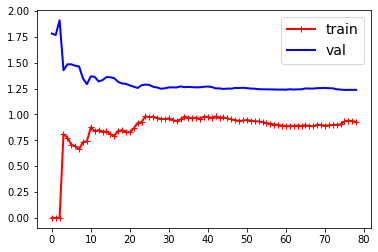

In [54]:
lin_reg= LinearRegression()

plot_learning_curves(lin_reg,X_poly,y)

In [57]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline ([
    ("ploy_features",PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg',LinearRegression())
])

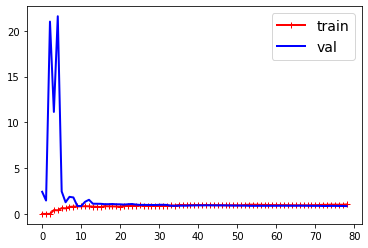

In [58]:
plot_learning_curves(polynomial_regression,X,y)

In [59]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[3.40579386]])

In [61]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.34758744])

In [64]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.3461245])

In [66]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.37294464])

In [67]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=.1, l1_ratio=.5)
elastic_reg.fit(X,y.ravel())
elastic_reg.predict([[1.5]])

array([3.37355892])

In [68]:
# Early Stoping

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [90]:
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))

X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int32)


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [91]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)


LogisticRegression()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


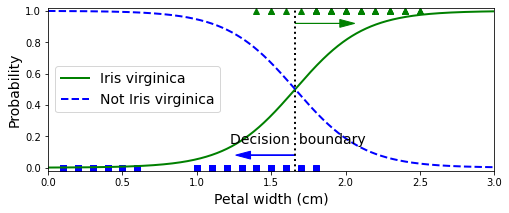

In [123]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [124]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [128]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [130]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])

array([2])

In [131]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [144]:
#Batch Gradient Descent using Softmax Regression

X = iris['data'][:,(2,3)]
y = iris['target']

# X_with_bias = np.c_[np.ones([len(X), 1]), X]
X_with_bias = np.c_[np.ones([len(X),1]),X]

np.random.seed(2042)

test_ratio = .2
validation_ratio = .2
total_size = int(len(X_with_bias))
test_size = int(total_size * test_ratio)
validation_size = int(total_size * (1-test_ratio) * validation_ratio)
train_size = int(total_size - test_size - validation_size)

rnd_indices = np.random.permutation(total_size)


X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-test_size]]
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[:-test_size]]
y_test = y[rnd_indices[:-test_size]]

In [151]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [152]:
y_train_one_hot = to_one_hot(y_train)
y_val_one_hot = to_one_hot(y_val)
y_test_one_hot = to_one_hot(y_test)